In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression

In [64]:
df = pd.read_csv("sources/linear_regression_dataset.csv",sep=";")

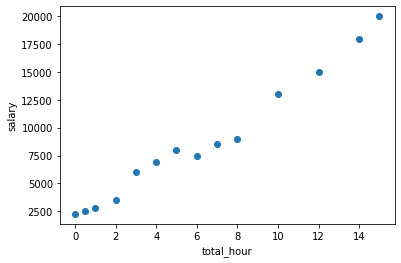

In [65]:
plt.scatter(df.total_hour,df.salary)
plt.xlabel("total_hour")
plt.ylabel("salary")
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
x = df.total_hour.values.reshape(-1,1) # linearRegression needs 2d array
y = df.salary.values.reshape(-1,1)

In [67]:
print(x.shape)
print(y.shape)
print("type of x: ",type(x))

(14, 1)
(14, 1)
type of x:  <class 'numpy.ndarray'>


In [68]:
linear_reg.fit(x,y)

LinearRegression()

In [69]:
import numpy as np

predict = linear_reg.predict([[0]]) # sklearn internally transformed this np.array([[0]])
b0 = linear_reg.intercept_ # intercept because the intercept y axis if x value is 0
b1 = linear_reg.coef_
print("Predict: ",predict)
print("Bias: ",b0)
print("Weight: ",b1)

Bias:  [1663.89519747]
Weight:  [[1138.34819698]]


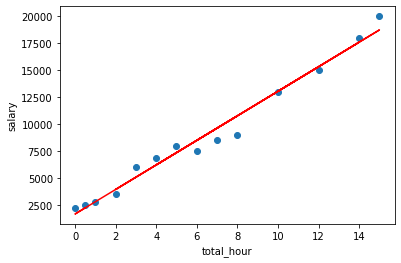

In [71]:
# visualize the line
y_predict = linear_reg.predict(df.total_hour.values.reshape(-1,1))
plt.scatter(x,y)
plt.xlabel("total_hour")
plt.ylabel("salary")
plt.plot(x,y_predict,color="red")
plt.show()

In [72]:
from sklearn.metrics import r2_score
y_pred = linear_reg.predict(x)
print("r_square score: ",r2_score(y,y_pred))

r_square score:  0.9775283164949903


# Multiple Linear Regression

In [21]:
df = pd.read_csv("sources/multiple_linear_regression_dataset.csv",sep=";")

In [22]:
x = df.iloc[:,[0,2]].values
y = df.total_hour.values.reshape(-1,1)
print(x.shape)
print(y.shape)

In [24]:
from sklearn.linear_model import LinearRegression
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

LinearRegression()

In [25]:
print("b0: ",multiple_linear_regression.intercept_)
print("Coefficients: ",multiple_linear_regression.coef_)

b0:  [-1.77635684e-15]
Coefficients:  [[1.00000000e+00 8.69949189e-17]]


In [27]:
print(linear_reg.predict([[11]]))

[[14185.72536421]]


# Polynomial Regression

In [28]:
df = pd.read_csv("sources/polynomial_regression.csv",sep=";")

In [30]:
x = df.max_speed.values.reshape(-1,1)
y = df.price.values.reshape(-1,1)

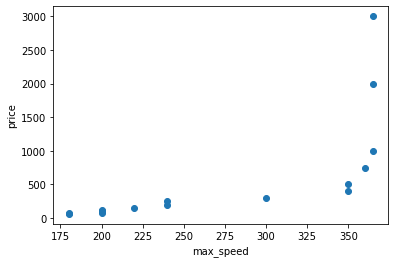

In [31]:
plt.scatter(x,y)
plt.xlabel("max_speed")
plt.ylabel("price")
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree=2)
x_polynomial = polynomial_regression.fit_transform(x)

In [33]:
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)

LinearRegression()

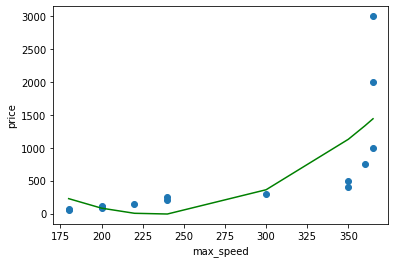

In [35]:
y_pred = linear_regression.predict(x_polynomial)
plt.scatter(x,y)
plt.xlabel("max_speed")
plt.ylabel("price")
plt.plot(x,y_pred,color = "green")
plt.show()

# Decision Tree Regression

In [4]:
df = pd.read_csv("sources/decision_tree_regression.csv",sep = ";",header = None)

In [5]:
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values.reshape(-1,1)

In [6]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

DecisionTreeRegressor()

In [7]:
tree_reg.predict([[10]])

array([5.])

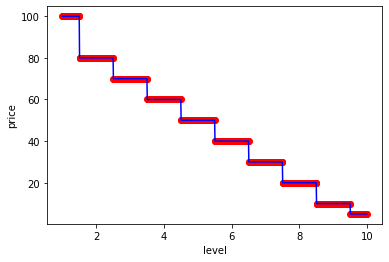

In [47]:
#x = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_pred = tree_reg.predict(x)
plt.scatter(x,y_pred,color="red")
plt.plot(x,y_pred,color="blue")
plt.xlabel("level")
plt.ylabel("price")
plt.show()

In [48]:
from sklearn.tree import export_graphviz 
# http://webgraphviz.com/
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(tree_reg, out_file ='tree.dot',
               feature_names =['Level']) 

# Random Forest Regression

In [51]:
df = pd.read_csv("sources/random_forest_regression.csv",sep = ";",header = None)

In [52]:
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values.reshape(-1,1)

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x,y)

/tmp/ipykernel_22946/285700776.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor(random_state=42)

In [55]:
print(rf.predict([[7.8]]))

[22.7]


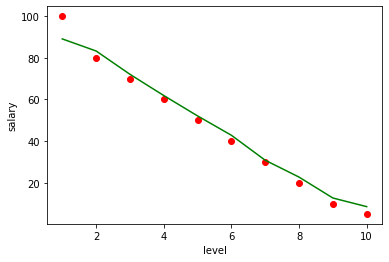

In [57]:
plt.scatter(x,y,color="red")
plt.plot(x,rf.predict(x),color="green")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[1], 
          feature_names="level",
          class_names="salary", 
          filled=True, impurity=True, 
          rounded=True)

In [61]:
from sklearn.metrics import r2_score
y_pred = rf.predict(x)
print("r_score: ",r2_score(y,y_pred))

r_score:  0.9798724794092587
